In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier

In [2]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

In [3]:
def initialize_parameters(n_x, n_h, n_y,bias,p):
    if p==0:
        W1 = np.zeros((n_h, n_x))
        b1 = np.zeros((n_h, 1))
        W2 = np.zeros((n_y, n_h))
        b2 = np.zeros((n_y, 1))
    elif p==1:
        W1 = np.zeros((n_h, n_x))
        b1 = np.zeros((n_h, 1))
        W2 = np.zeros((n_y, n_h))
        b2 = np.zeros((n_y, 1))
    else:
        W1 = np.random.randn(n_h, n_x)
        b1 = np.zeros((n_h, 1))
        W2 = np.random.randn(n_y, n_h)
        b2 = np.zeros((n_y, 1)) 

    parameters = {
        "W1": W1,
        "b1" : b1,
        "W2": W2,
        "b2" : b2
    }
    
    if bias==False:
        parameters = {
        "W1": W1,
        "W2": W2
        }
        
    return parameters

In [4]:
def forward_prop(X, parameters,bias):
    W1 = parameters["W1"]
    W2 = parameters["W2"]
  
    if bias==False:
        Z1 = np.dot(W1, X)
        A1 = np.tanh(Z1)
        Z2 = np.dot(W2, A1)
        A2 = sigmoid(Z2)
    else:
        b1 = parameters["b1"]
        b2 = parameters["b2"]

        Z1 = np.dot(W1, X) + b1
        A1 = np.tanh(Z1)
        Z2 = np.dot(W2, A1) + b2
        A2 = sigmoid(Z2)
        
    cache = {
        "A1": A1,
        "A2": A2
    }
    return A2, cache

In [5]:
def calculate_cost(A2, yy):
    cost = np.sum((A2-yy)**2)/m
    return cost

In [6]:
def backward_prop(X, Y, cache, parameters,bias):
    A1 = cache["A1"]
    A2 = cache["A2"]

    W2 = parameters["W2"]

    dZ2 = (A2 - Y)*A2*(1-A2)
    dW2 = np.dot(dZ2, A1.T)/m
    db2 = np.sum(dZ2, axis=1, keepdims=True)/m

    dZ1 = np.multiply(np.dot(W2.T, dZ2), 1-np.power(A1, 2))
    dW1 = np.dot(dZ1, X.T)/m
    
    db1 = np.sum(dZ1, axis=1, keepdims=True)/m
    
    if bias==False:
        grads = {
        "dW1": dW1,
        "dW2": dW2,
        }
    else:
        grads = {
        "dW1": dW1,
        "db1": db1,
        "dW2": dW2,
        "db2": db2
        }

    return grads

In [7]:
def update_parameters(parameters, grads, learning_rate,bias):
    W1 = parameters["W1"] - learning_rate*grads["dW1"]
    W2 = parameters["W2"] - learning_rate*grads["dW2"]
    if bias==True:
        b1 = parameters["b1"] - learning_rate*grads["db1"]
        b2 = parameters["b2"] - learning_rate*grads["db2"]
        new_parameters = {
        "W1": W1,
        "W2": W2,
        "b1" : b1,
        "b2" : b2
        }
    else:
        new_parameters = {
        "W1": W1,
        "W2": W2,
        }
        
    return new_parameters

In [8]:
def model(X, Y, n_x, n_h, n_y, num_of_iters, learning_rate,bias,p):
    parameters = initialize_parameters(n_x, n_h, n_y,bias,p)
    
    costs = []
    
    for i in range(0, num_of_iters+1):
        a2, cache = forward_prop(X, parameters,bias)

        cost = calculate_cost(a2, Y)
        costs.append(cost)

        grads = backward_prop(X, Y, cache, parameters,bias)

        parameters = update_parameters(parameters, grads, learning_rate,bias)

        if(i%500 == 0):
            print('Cost after iteration# {:d}: {:f}'.format(i, cost))

    return parameters,costs

In [9]:
def predict(X, parameters,bias):
    a2, cache = forward_prop(X, parameters,bias)
    return a2

In [10]:
np.random.seed(2)

data=np.random.multivariate_normal([0,0],[[1,0],[0,1]],200)

A_data=np.random.multivariate_normal([0,0],[[1,0],[0,1]],100)
A_label=np.ones(100)
B_data=np.random.multivariate_normal([0,0],[[1,0],[0,1]],100)
B_label=np.zeros(100)
train_data=np.concatenate((A_data[0:80,:],B_data[0:80,:]),axis=0)
train_label=np.concatenate((A_label[0:80],B_label[0:80]))
test_data=np.concatenate((A_data[80:100,:],B_data[80:100,:]),axis=0)
test_label=np.concatenate((A_label[80:100],B_label[80:100]))
print(train_data.shape)
print(test_data.shape)
print(train_label.shape)
print(test_label.shape)


X = train_data.T
Y = train_label
X_test = test_data.T
Y_test = test_label

# No. of training examples
m = X.shape[1]

# Set the hyperparameters
n_x = 2     #No. of neurons in first layer
n_h = 2     #No. of neurons in hidden layer
n_y = 1     #No. of neurons in output layer
num_of_iters = 1000
learning_rate = 0.1

trained_parameters_0,costs_0 = model(X, Y, n_x, n_h, n_y, num_of_iters, learning_rate,True,0)
trained_parameters_1,costs_1 = model(X, Y, n_x, n_h, n_y, num_of_iters, learning_rate,True,1)
trained_parameters_2,costs_2 = model(X, Y, n_x, n_h, n_y, num_of_iters, learning_rate,True,2)



(160, 2)
(40, 2)
(160,)
(40,)
Cost after iteration# 0: 0.250000
Cost after iteration# 500: 0.250000
Cost after iteration# 1000: 0.250000
Cost after iteration# 0: 0.250000
Cost after iteration# 500: 0.250000
Cost after iteration# 1000: 0.250000
Cost after iteration# 0: 0.252719
Cost after iteration# 500: 0.247748
Cost after iteration# 1000: 0.247017


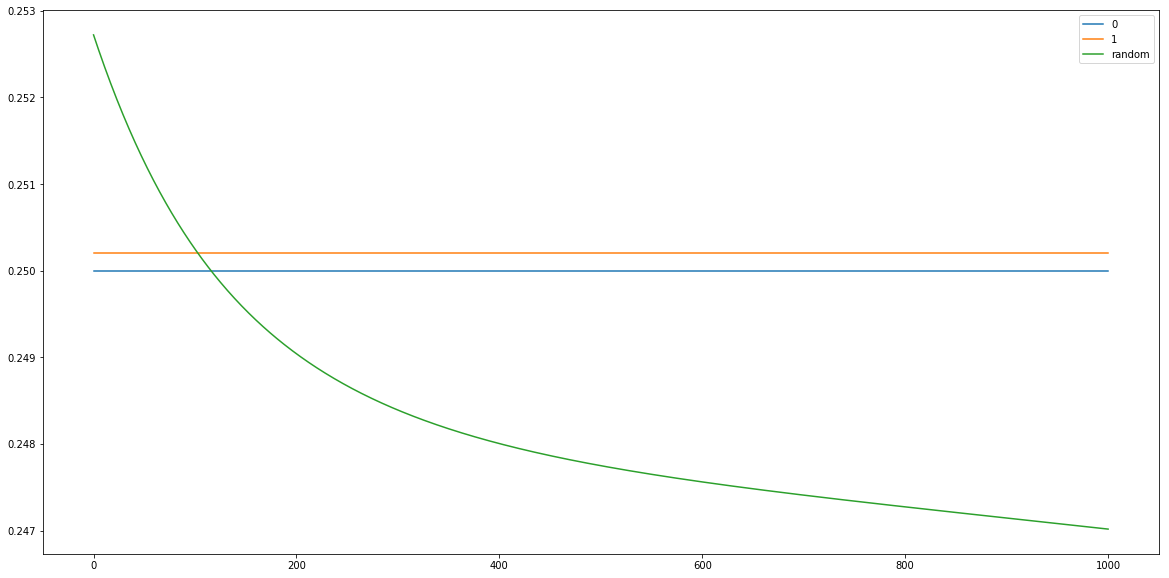

In [24]:
plt.figure(figsize=(20,10))
plt.plot(costs_0,label='0')
plt.plot(np.array(costs_1)+0.0002,label='1')
plt.plot(costs_2,label='random')
plt.legend()
plt.show()